#    Redução de dimensionalidade 
#       de imagens com RBM

Uso de Máquinas de Boltzmann restritas para redução de dimensionalidade de imagens e melhoria de desempenho do Gaussian NaiveBayes na classificação de dígitos manuscritos.

## Importações e Pré processamento

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

In [5]:
base = datasets.load_digits()

In [6]:
previsores = np.asarray(base.data, 'float32')

In [7]:
classe = base.target

In [11]:
normalizador = MinMaxScaler(feature_range=(0,1))

In [12]:
previsores = normalizador.fit_transform(previsores)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(previsores, classe,
                                                    test_size=0.3, random_state=0)

## Construção e treinamento do Modelo

In [15]:
rbm = BernoulliRBM(random_state=0)

In [16]:
rbm.n_iter = 25
rbm.n_components = 50

In [17]:
naive_rbm = GaussianNB()

In [18]:
classificador_rbm = Pipeline(steps = [('rbm', rbm), ('naive_bayes', naive_rbm)])

In [19]:
classificador_rbm.fit(X_train, y_train)

Pipeline(steps=[('rbm',
                 BernoulliRBM(n_components=50, n_iter=25, random_state=0)),
                ('naive_bayes', GaussianNB())])

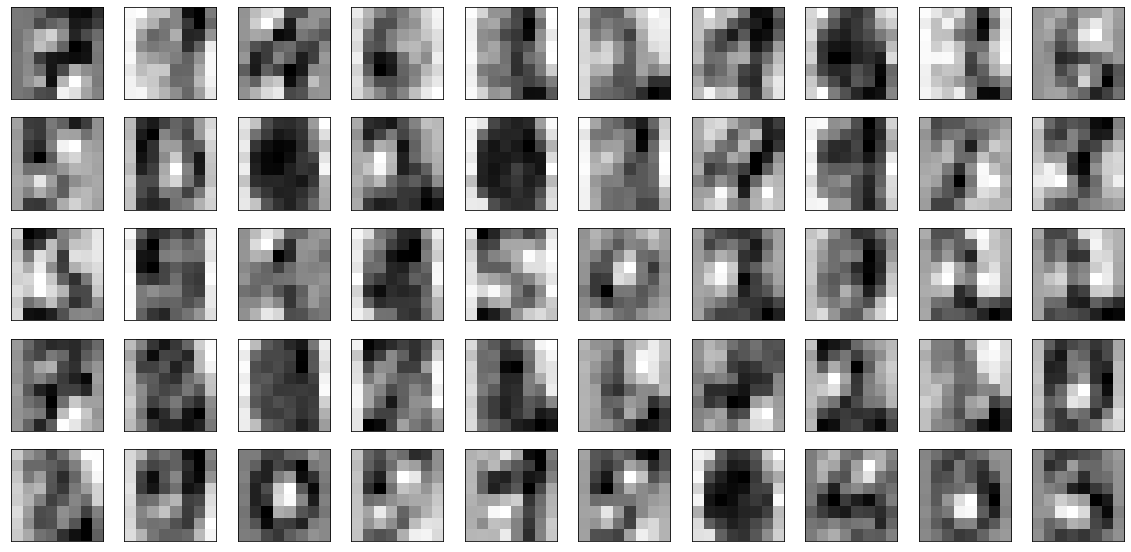

In [20]:
plt.figure(figsize=(20,20))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10,10, i+1)
    plt.imshow(comp.reshape((8,8)), cmap=plt.cm.gray_r)
    plt.xticks(())
    plt.yticks(())
plt.show()

## Teste e Desempenho do Modelo

In [33]:
previsoes_rbm = classificador_rbm.predict(X_test)

In [34]:
precisao_rbm = metrics.accuracy_score(previsoes_rbm, y_test)
precisao_rbm

0.8666666666666667

In [35]:
naive_simples = GaussianNB()

In [36]:
naive_simples.fit(X_train, y_train)

GaussianNB()

In [37]:
previsoes_naive = naive_simples.predict(X_test)

In [38]:
precisao_naive = metrics.accuracy_score(previsoes_naive, y_test)
precisao_naive

0.7962962962962963